## All imports:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.1f' % x)

## Working with data:

In [2]:
apple_store = pd.read_csv("appstore/AppleStore.csv")
apple_store_desc = pd.read_csv("appstore/appleStore_description.csv")
# importing all data for AppStore 


apple_store = apple_store.drop(['id', 'Unnamed: 0'], axis=1).astype({'size_bytes': 'int64',})\
.rename({'rating_count_tot': 'rating_count_total', 'user_rating': 'rating', 'track_name': 'app'}, axis=1)


In [3]:
google_play_store = pd.read_csv("googleplay/googleplaystore.csv")
google_play_store_reviews = pd.read_csv("googleplay/googleplaystore_user_reviews.csv")
# importing all data for GooglePlay



for index in google_play_store.index:
    size = google_play_store.loc[index, 'Size']
    installs = google_play_store.loc[index, 'Installs']
    price = google_play_store.loc[index, 'Price']
    if installs.find("+") != -1:
        google_play_store.loc[index, 'Installs'] = installs[:-1].replace(",", "")
    if size.find("M") != -1:
        google_play_store.loc[index, 'Size'] = float(size[:-1]) * 125000 
        # removing "M" changing type from str to float and converting to bytes 
    elif size.find("k") != -1:
        google_play_store.loc[index, 'Size'] = float(size[:-1]) * 1000 
        # removing "k" changing type from str to float and converting to bytes 
    elif size.find('Varies') != -1:
        google_play_store.loc[index, 'Size'] = -1
    if price.find("$") != -1:
        google_play_store.loc[index, 'Price'] = price[1:]
        
        
google_play_store = google_play_store.astype({"Reviews": 'int32', "Rating": float, "Installs": 'int32', "Size": float, 'Price': float})\
.rename({'Size': 'size_bytes', 'Reviews': 'rating_count_total', 'Rating': 'rating', 'App': 'app', 'Current Ver': "ver", 'Price': 'price', 'Installs': 'installs'}, axis=1)


# make apple store genres and google play store categories with equal names
# todo music in google play

google_play_store['Genres'] = google_play_store['Genres'].str.split(';').str[0]

google_play_store['Genres'].replace('Music & Audio', 'Music', inplace = True)
google_play_store['Genres'].replace('Music & Video', 'Music', inplace = True)

#google_play_store['Category'].replace('Music & Video', 'Music', inplace = True)
#google_play_store['Category'].replace(' ', 'Music', inplace = True) #saffssdafsdsfsdfsdfdsfdsfsdfsdfsfsd

google_play_store['Category'].replace('GAME', 'Games', inplace = True)
google_play_store['Category'].replace('PRODUCTIVITY', 'Productivity', inplace = True)
google_play_store['Category'].replace('WEATHER', 'Weather', inplace = True)
google_play_store['Category'].replace('SHOPPING', 'Shopping', inplace = True)
google_play_store['Category'].replace('FINANCE', 'Finance', inplace = True)
google_play_store['Category'].replace('TOOLS', 'Utilities', inplace = True)
google_play_store['Category'].replace('PERSONALIZATION', 'Utilities', inplace = True)
google_play_store['Category'].replace('TRAVEL_AND_LOCAL', 'Travel', inplace = True)
google_play_store['Category'].replace('SOCIAL', 'Social Networking', inplace = True)
google_play_store['Category'].replace('DATING', 'Social Networking', inplace = True)
google_play_store['Category'].replace('COMMUNICATION', 'Social Networking', inplace = True)
google_play_store['Category'].replace('SPORTS', 'Sports', inplace = True)
google_play_store['Category'].replace('BUSINESS', 'Business', inplace = True)
google_play_store['Category'].replace('HEALTH_AND_FITNESS', 'Health & Fitness', inplace = True)
google_play_store['Category'].replace('BEAUTY', 'Health & Fitness', inplace = True)
google_play_store['Category'].replace('ENTERTAINMENT', 'Entertainment', inplace = True)
google_play_store['Category'].replace('COMICS', 'Entertainment', inplace = True)
google_play_store['Category'].replace('VIDEO_PLAYERS', 'Photo & Video', inplace = True)
google_play_store['Category'].replace('PHOTOGRAPHY', 'Photo & Video', inplace = True)
google_play_store['Category'].replace('ART_AND_DESIGN', 'Photo & Video', inplace = True)
google_play_store['Category'].replace('MAPS_AND_NAVIGATION', 'Navigation', inplace = True)
google_play_store['Category'].replace('EDUCATION', 'Education', inplace = True)
google_play_store['Category'].replace('PARENTING', 'Education', inplace = True)
google_play_store['Category'].replace('LIFESTYLE', 'Lifestyle', inplace = True)
google_play_store['Category'].replace('EVENTS', 'Lifestyle', inplace = True)
google_play_store['Category'].replace('HOUSE_AND_HOME', 'Lifestyle', inplace = True)
google_play_store['Category'].replace('AUTO_AND_VEHICLES', 'Lifestyle', inplace = True)
google_play_store['Category'].replace('FAMILY', 'Lifestyle', inplace = True)
google_play_store['Category'].replace('FOOD_AND_DRINK', 'Food & Drink', inplace = True)
google_play_store['Category'].replace('NEWS_AND_MAGAZINES', 'News', inplace = True)
google_play_store['Category'].replace('MEDICAL', 'Medical', inplace = True)
google_play_store['Category'].replace('LIBRARIES_AND_DEMO', 'Catalogs', inplace = True)


apple_store.prime_genre.replace('Book', 'Books & Reference', inplace = True)
apple_store.prime_genre.replace('Reference', 'Books & Reference', inplace = True)
google_play_store['Category'].replace('BOOKS_AND_REFERENCE', 'Books & Reference', inplace = True)


In [4]:
# music apps for google play

for i in range(len(google_play_store['Genres'])):
    if google_play_store['Genres'].iloc[i] == 'Music':
        google_play_store['Category'].iloc[i] = 'Music'
    else:
        continue

#google_play_store['Category'] == 'Music'

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [5]:
google_play_store["rating"] = google_play_store["rating"].fillna(google_play_store["rating"].median())
#replacing all NaN values with median of column 'rating'

In [6]:
#google_play_store[google_play_store['price'] > 60] # uncomment and run to see all expensive apps

In [7]:
# all apps with price above 110 is just "i am rich" and "most expensive app" so i think we can easily remove them
google_play_store = google_play_store[google_play_store['price'] <= 80]

In [8]:
#apple_store[apple_store['price'] > 60 ] # uncomment and run to see all expensive apps

In [9]:
apple_store = apple_store[apple_store['price'] <= 80]

In [10]:
# top rated apps for google where amount of reviews is more than 300
google_play_top = google_play_store[(google_play_store["rating_count_total"] > 300) & (google_play_store["rating"] >= 4.9)].sort_values(by=["rating_count_total"]) 


In [11]:
# top rated apps for google where amount of reviews is more than 300
apple_top = apple_store[(apple_store["rating_count_total"] > 300) & (apple_store["rating"] >= 4.9)].sort_values(by=["rating_count_total"]) 


#### After cells above:
    google_play_store :
        * reviews, installs are now type:int32
        * rating, size, price are now type:float
        * size now is int and it is in bytes
        * rating - plus "+" sign removed
        * junk/scam apps like "i am rich" with price 400 removed
        
    apple_store : (нехватает конечно количества скачиваний но можно написать примерное количество исходя из соотношения кол-ва оценок/кол-во скачиваний в гуглплэй)
        *

#### Cell bellow is for playing with dataframes

<IPython.core.display.Javascript object>


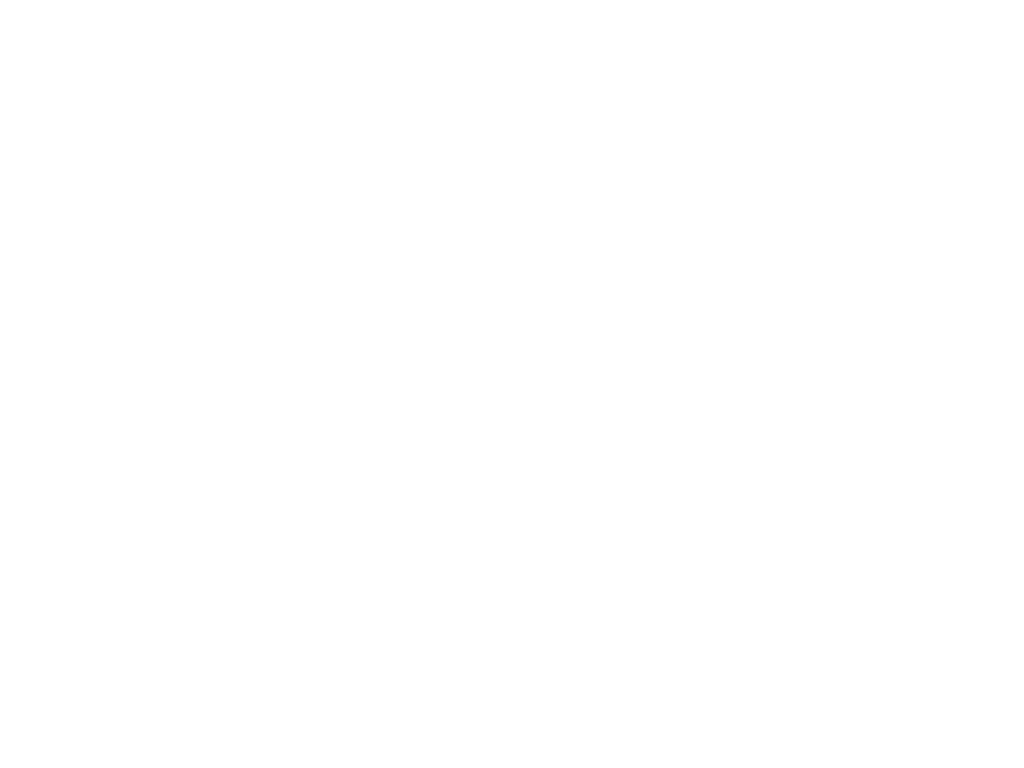

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


In [12]:
%matplotlib notebook

paid_apps_google = google_play_store[(google_play_store['price'] != 0.0)].fillna(0)
df1 = paid_apps_google.groupby("price").mean()

df2 = google_play_store[google_play_store['rating'].notna()].groupby("price").mean()
plt.title("Google play store grouped by price")
plt.ylabel('rating count')
plt.xlabel('price')

plt.ticklabel_format(style='plain')
plt.plot(df2.index, df2['installs'])

<IPython.core.display.Javascript object>


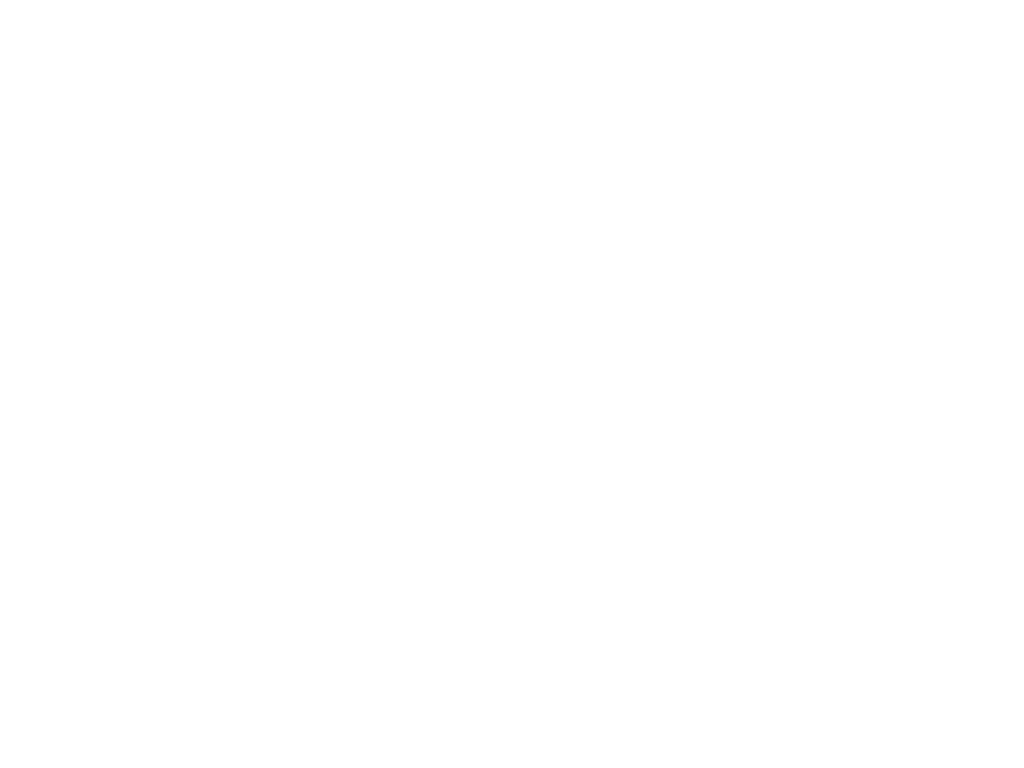

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


In [13]:
%matplotlib notebook

paid_apps_apple = apple_store[(apple_store['price'] != 0.0) & apple_store['rating'] > 0.0] 
df3 = paid_apps_apple.groupby("price").mean()


df4 = apple_store.groupby("price").mean()
plt.title("Apple Store grouped by price")
plt.xlabel('price')
plt.ylabel('rating count')

plt.ticklabel_format(style='plain')
plt.plot(df4.index, df4['rating_count_total'])

<IPython.core.display.Javascript object>


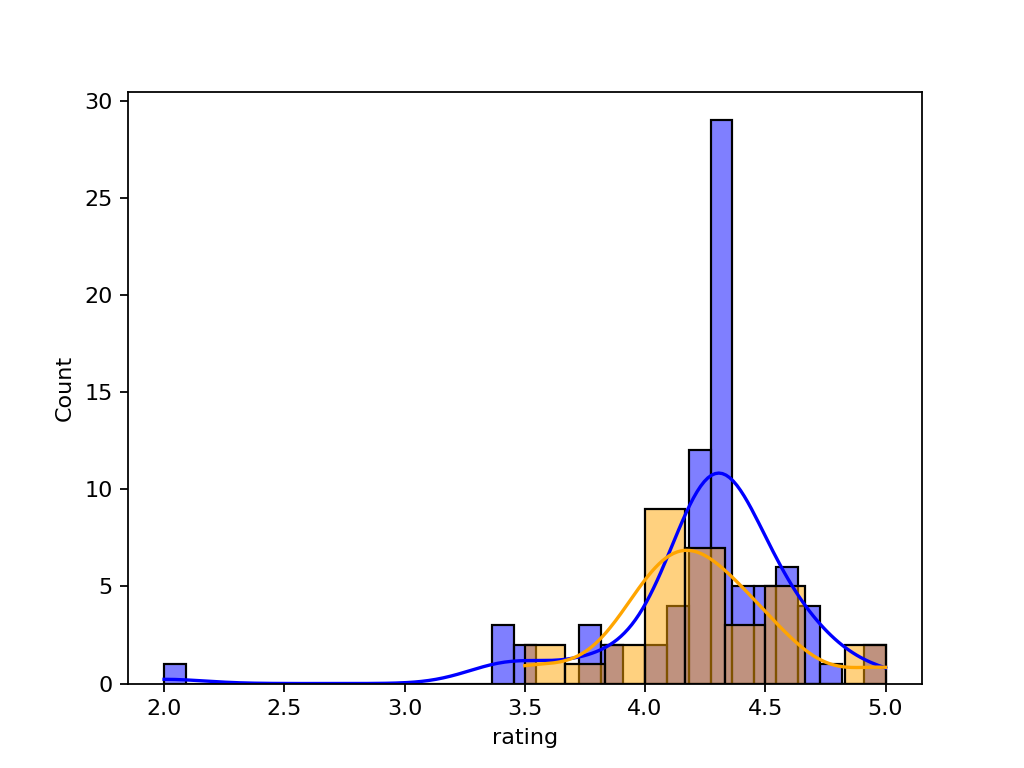

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/si

In [14]:
%matplotlib notebook

plt.ticklabel_format(style='plain')
sns.histplot(df1['rating'], kde=True, color='blue')
sns.histplot(df3['rating'], kde=True, color='orange')

In [15]:
apple_store[apple_store['rating']>5]

,app,size_bytes,currency,price,rating_count_total,rating_count_ver,rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic


<IPython.core.display.Javascript object>


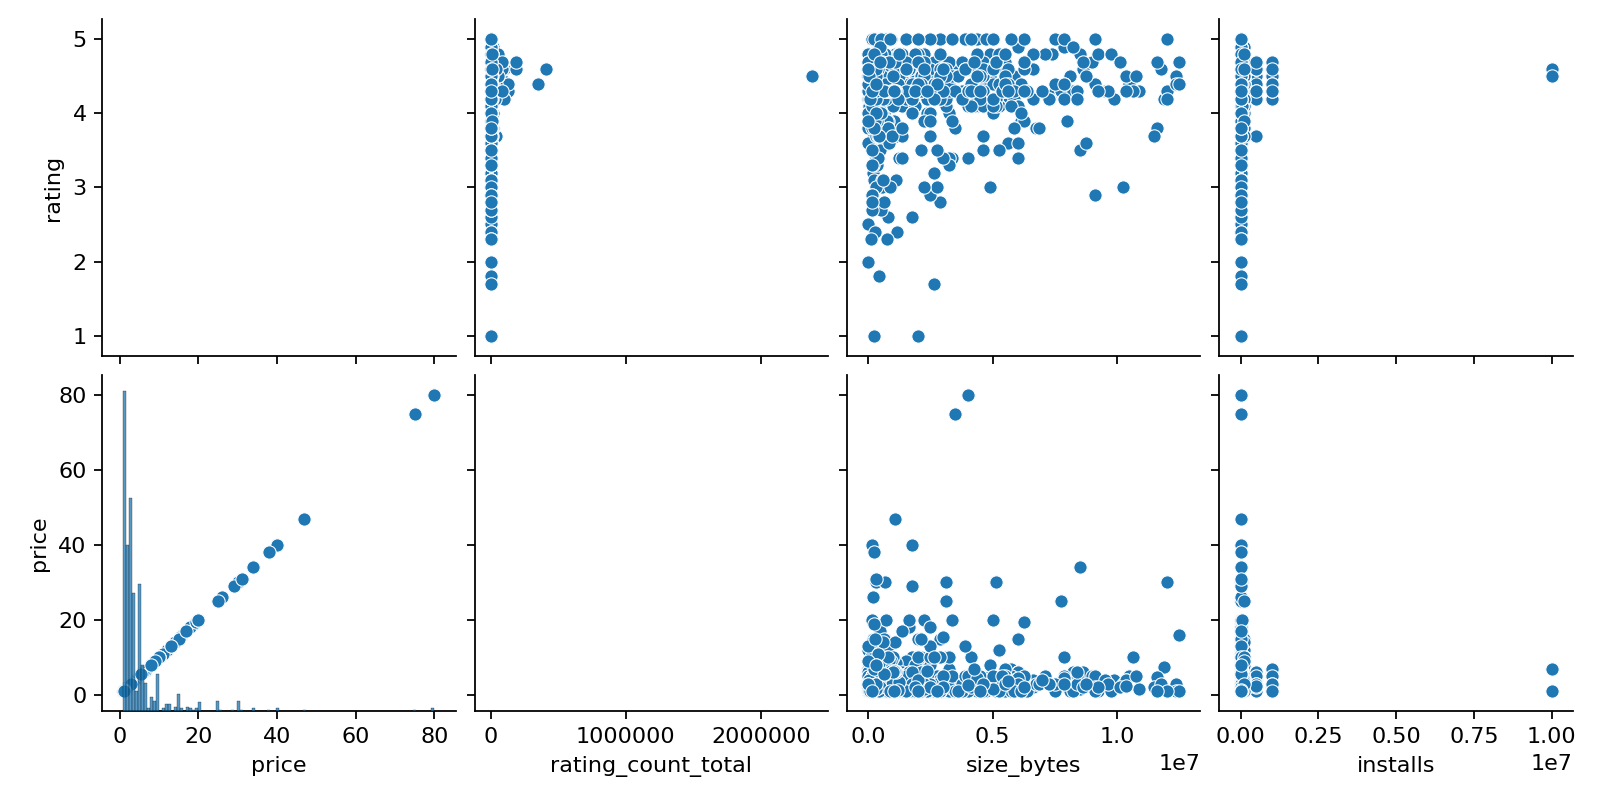

In [16]:
# some apps occure in table multiple times
google_play_store[google_play_store['app'] == 'Minecraft']
sns.pairplot(
    paid_apps_google,
    x_vars=['price', 'rating_count_total','size_bytes', 'installs'], # with 'price' it isn't working ¯\_(ツ)_/¯
    # and if change 'price' with for example  'rating_count_total' it'll give exception that price is not in index
    # also first chart isn't showing and i don't know why(if we just remove 'price')
    y_vars=["rating", 'price'],
)

In [17]:
comp_apple  = apple_store.prime_genre.value_counts().to_frame(name = 'apple').sort_index()
comp_free_apple  = apple_store[apple_store['price'] == 0].prime_genre.value_counts().to_frame(name = 'free_apple').sort_index()
comp_paid_apple = apple_store[apple_store['price'] != 0].prime_genre.value_counts().to_frame(name =  'paid_apple').sort_index()
comp_google = google_play_store['Category'].value_counts().to_frame(name =  'google').sort_index()
comp_free_google = google_play_store[google_play_store['Type'] == 'Free'].Category.value_counts().to_frame(name =  'free_google').sort_index()
comp_paid_google = google_play_store[google_play_store['Type'] == 'Paid'].Category.value_counts().to_frame(name =  'paid_google').sort_index()

comparison = comp_apple.join(comp_free_apple).join(comp_paid_apple).join(comp_google).join(comp_free_google).join(comp_paid_google)


comparison.columns = ['Total Apple', 'Free Apple','Paid Apple','Total Google', 'Free Google','Paid Google']

comparison['Paid Apple%'] = comparison['Paid Apple'] * 100/comparison['Total Apple']
comparison['Free Apple%'] = comparison['Free Apple'] * 100/comparison['Total Apple']
comparison['Paid Google%'] = comparison['Paid Google']*100/comparison['Total Google']
comparison['Free Google%'] = comparison['Free Google'] * 100/comparison['Total Google']

comparison = comparison[['Total Apple','Free Apple', 'Paid Apple','Free Apple%', 'Paid Apple%', 'Total Google','Free Google', 'Paid Google','Free Google%', 'Paid Google%']]
comparison


,Total Apple,Free Apple,Paid Apple,Free Apple%,Paid Apple%,Total Google,Free Google,Paid Google,Free Google%,Paid Google%
Books & Reference,176,86,90,48.9,51.1,231,203,28,87.9,12.1
Business,57,20,37,35.1,64.9,459,446,13,97.2,2.8
Catalogs,10,9,1,90.0,10.0,85,84,1,98.8,1.2
Education,451,132,319,29.3,70.7,216,210,6,97.2,2.8
Entertainment,535,334,201,62.4,37.6,209,207,2,99.0,1.0
Finance,104,84,20,80.8,19.2,359,349,10,97.2,2.8
Food & Drink,63,43,20,68.3,31.7,127,125,2,98.4,1.6
Games,3862,2257,1605,58.4,41.6,1122,1040,82,92.7,7.3
Health & Fitness,180,76,104,42.2,57.8,394,378,16,95.9,4.1
Lifestyle,144,94,50,65.3,34.7,2576,2373,202,92.1,7.8


ap_tot = comparison['Total Apple'].sort_index()
ap_free = comparison['Free Apple'].sort_index()
ap_paid = comparison['Paid Apple'].sort_index()
go_tot = comparison['Total Google'].sort_index()
go_free = comparison['Free Google'].sort_index()
go_paid = comparison['Paid Google'].sort_index()

<IPython.core.display.Javascript object>


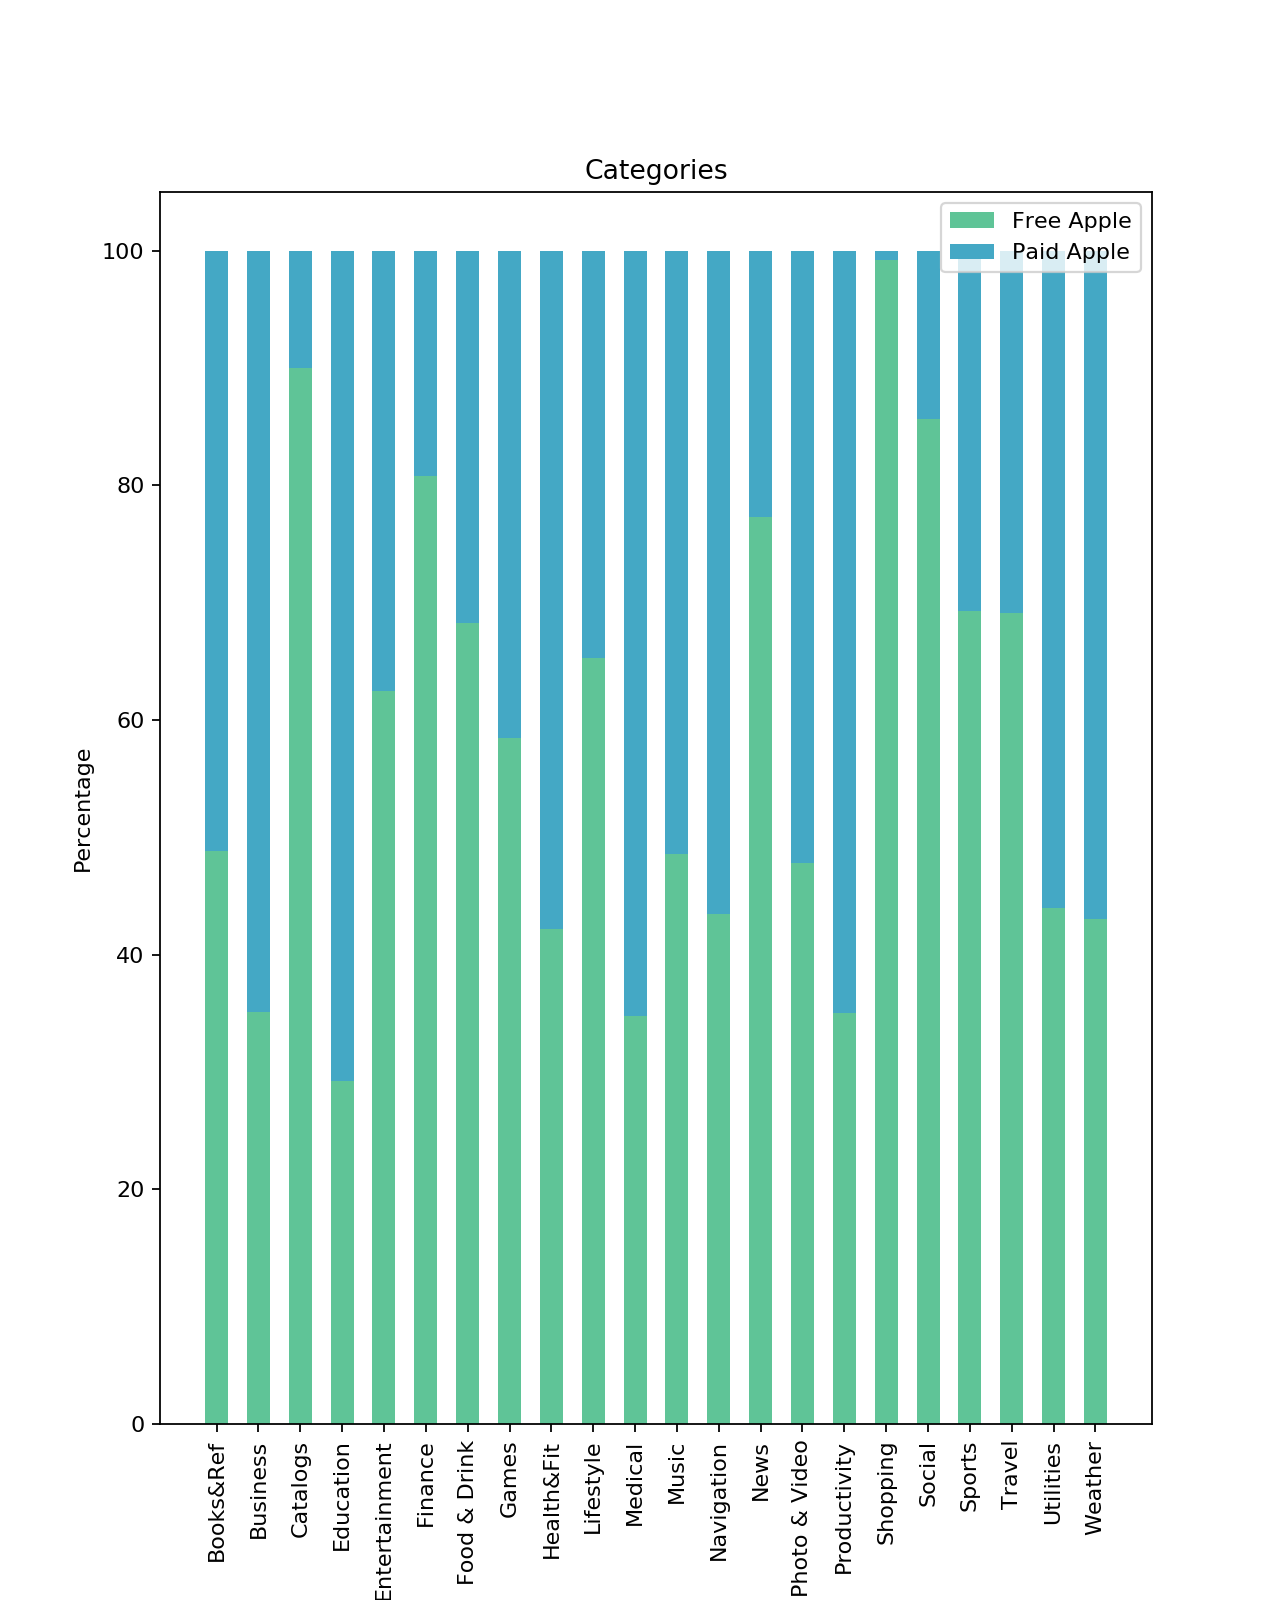

In [18]:
#https://www.kaggle.com/shekhart47/appstore-analysis
#plot idea

plt.figure(figsize =(8,10))
free_apple_tuple = tuple(comparison['Free Apple%'].sort_index().tolist())
paid_apple_tuple = tuple(comparison['Paid Apple%'].sort_index().tolist())

import numpy as np
import matplotlib.pyplot as plt



N = 22

ind = np.arange(N)    # the x locations for the groups
width = 0.55      # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, free_apple_tuple, width,color  ='#5fc497')
p2 = plt.bar(ind, paid_apple_tuple, width,
             bottom=free_apple_tuple, color = '#44a8c5')

plt.ylabel('Percentage')
plt.title('Categories')
plt.xticks(rotation=90)
plt.xticks(ind, ('Books&Ref', 'Business', 'Catalogs', 'Education', 'Entertainment',
                'Finance', 'Food & Drink', 'Games', 'Health&Fit', 'Lifestyle', 'Medical',
                'Music', 'Navigation', 'News', 'Photo & Video', 'Productivity', 'Shopping', 'Social',
                'Sports', 'Travel', 'Utilities', 'Weather'))
plt.legend((p1[0], p2[0]), ('Free Apple', 'Paid Apple'))


plt.show()

<IPython.core.display.Javascript object>


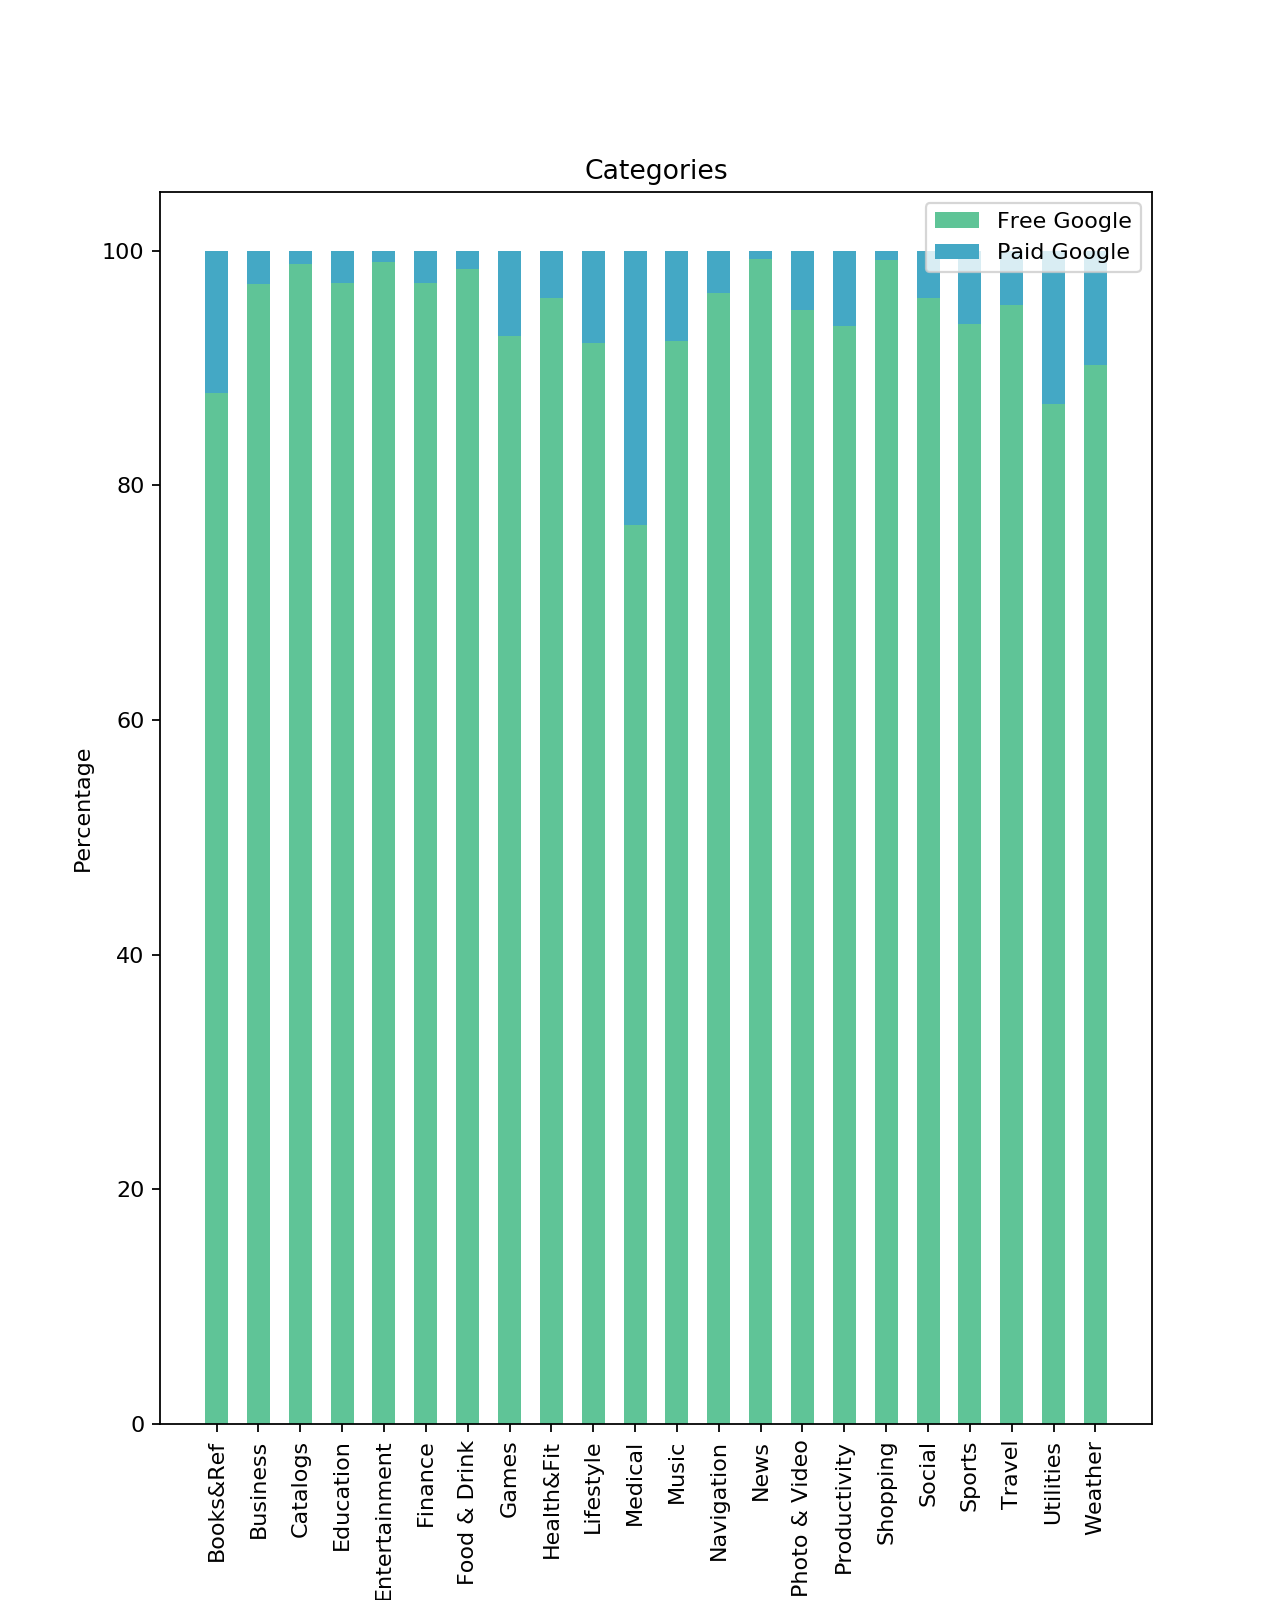

In [19]:
#https://www.kaggle.com/shekhart47/appstore-analysis
#plot idea from here

plt.figure(figsize =(8,10))
free_google_tuple = tuple(comparison['Free Google%'].sort_index().tolist())
paid_google_tuple = tuple(comparison['Paid Google%'].sort_index().tolist())

import numpy as np
import matplotlib.pyplot as plt



N = 22

ind = np.arange(N)    # the x locations for the groups
width = 0.55      # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, free_google_tuple, width,color  ='#5fc497')
p2 = plt.bar(ind, paid_google_tuple, width,
             bottom=free_google_tuple, color = '#44a8c5')

plt.ylabel('Percentage')
plt.title('Categories')
plt.xticks(rotation=90)
plt.xticks(ind, ('Books&Ref', 'Business', 'Catalogs', 'Education', 'Entertainment',
                'Finance', 'Food & Drink', 'Games', 'Health&Fit', 'Lifestyle', 'Medical',
                'Music', 'Navigation', 'News', 'Photo & Video', 'Productivity', 'Shopping', 'Social',
                'Sports', 'Travel', 'Utilities', 'Weather'))
plt.legend((p1[0], p2[0]), ('Free Google', 'Paid Google'))


plt.show()

In [20]:
#plot function
#https://www.kaggle.com/rj1993/appstore-apps-analysis-and-insights

def annot_plot(ax,w,h):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))

<IPython.core.display.Javascript object>


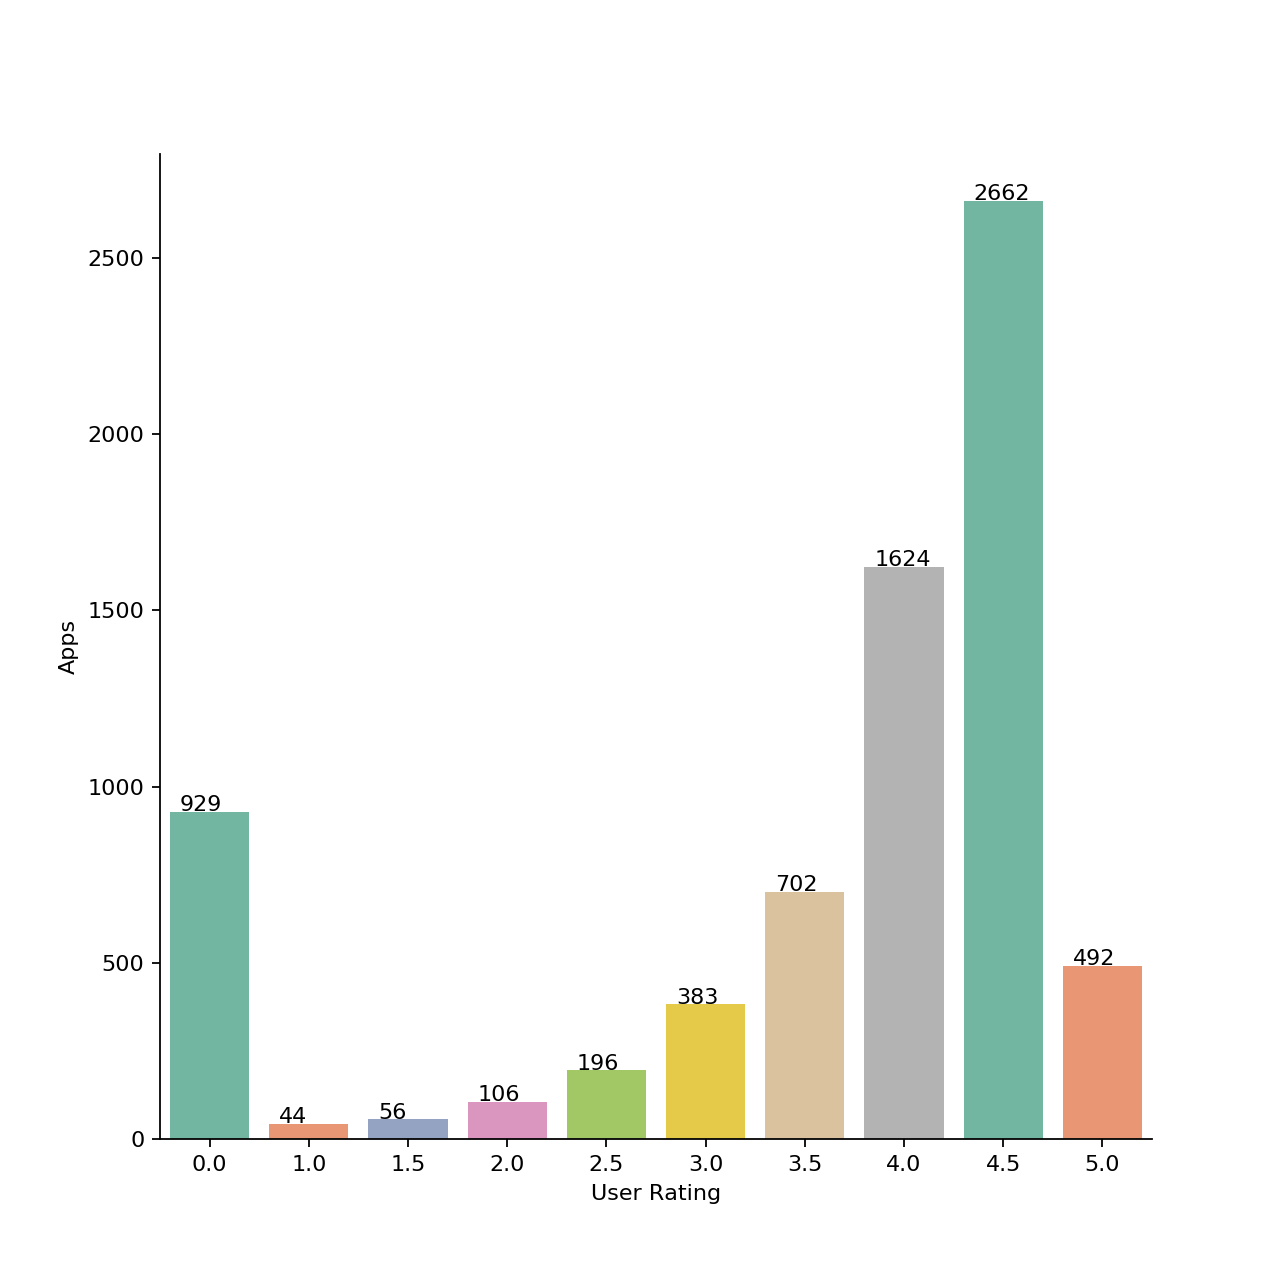

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


In [21]:
#idea from
#https://www.kaggle.com/rj1993/appstore-apps-analysis-and-insights
plt.figure(figsize=(8,8))
ax=sns.countplot('rating',data=apple_store,palette="Set2")
plt.xlabel('User Rating')
plt.ylabel('Apps')
annot_plot(ax,0.1,1)

<IPython.core.display.Javascript object>


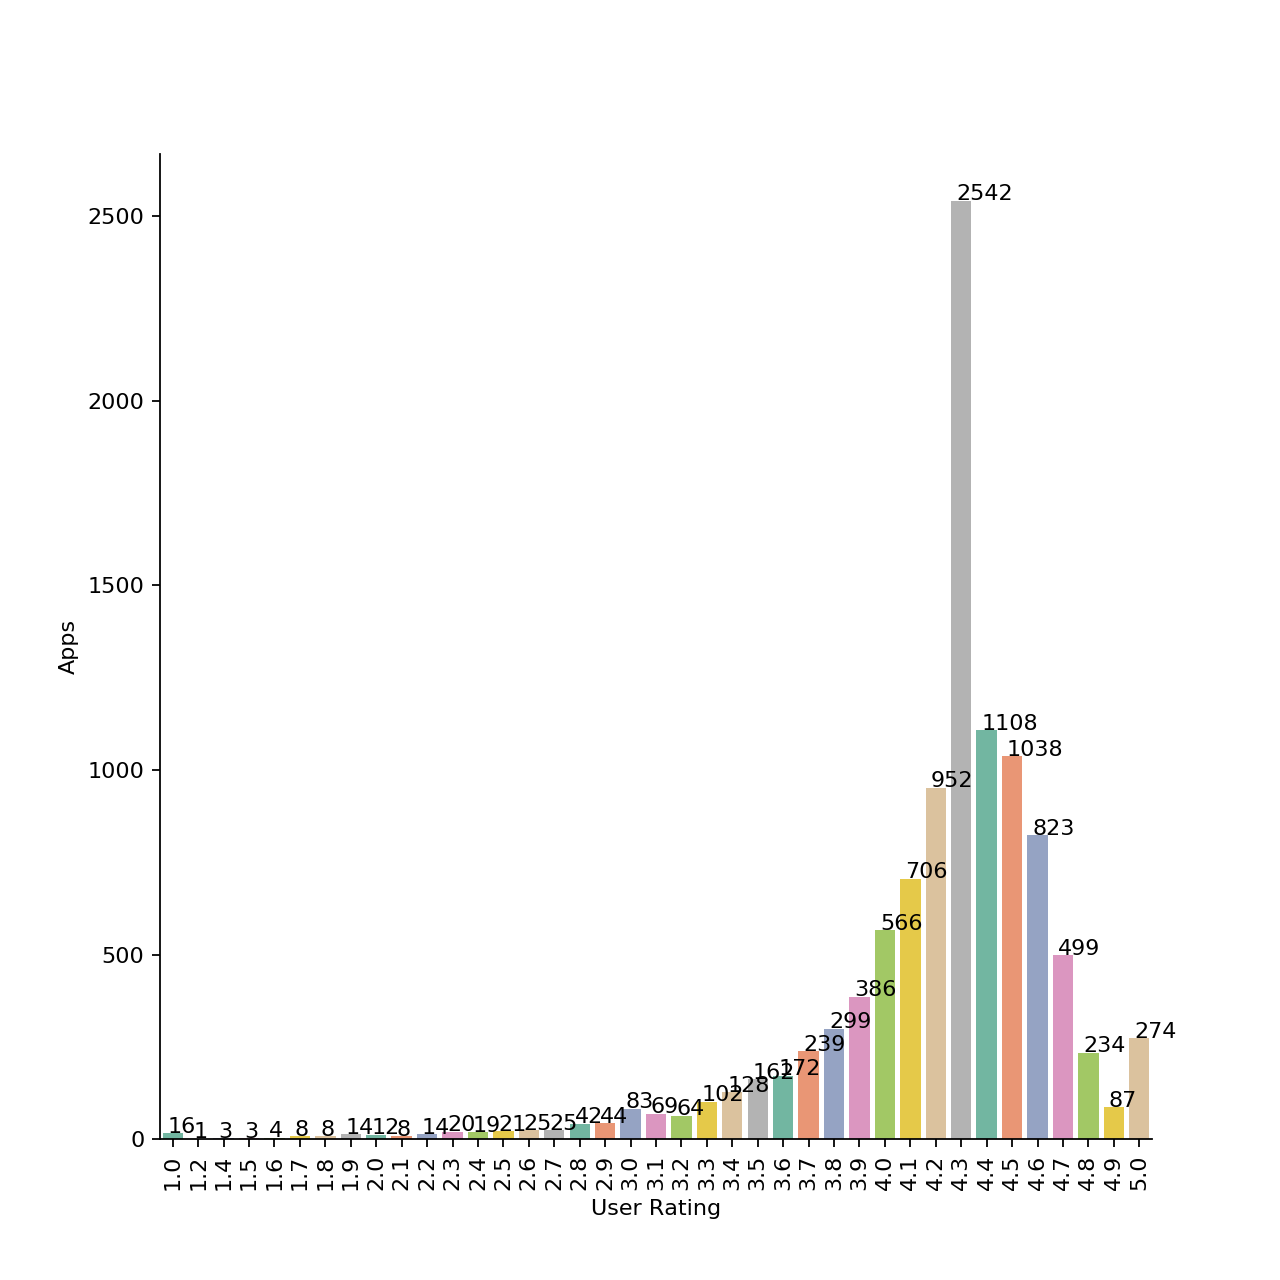

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


In [22]:
#idea from
#https://www.kaggle.com/rj1993/appstore-apps-analysis-and-insights
plt.figure(figsize=(8,8))
ax=sns.countplot('rating',data=google_play_store,palette="Set2")
plt.xticks(rotation=90)
plt.xlabel('User Rating')
plt.ylabel('Apps')
annot_plot(ax,0.2,1)

<IPython.core.display.Javascript object>


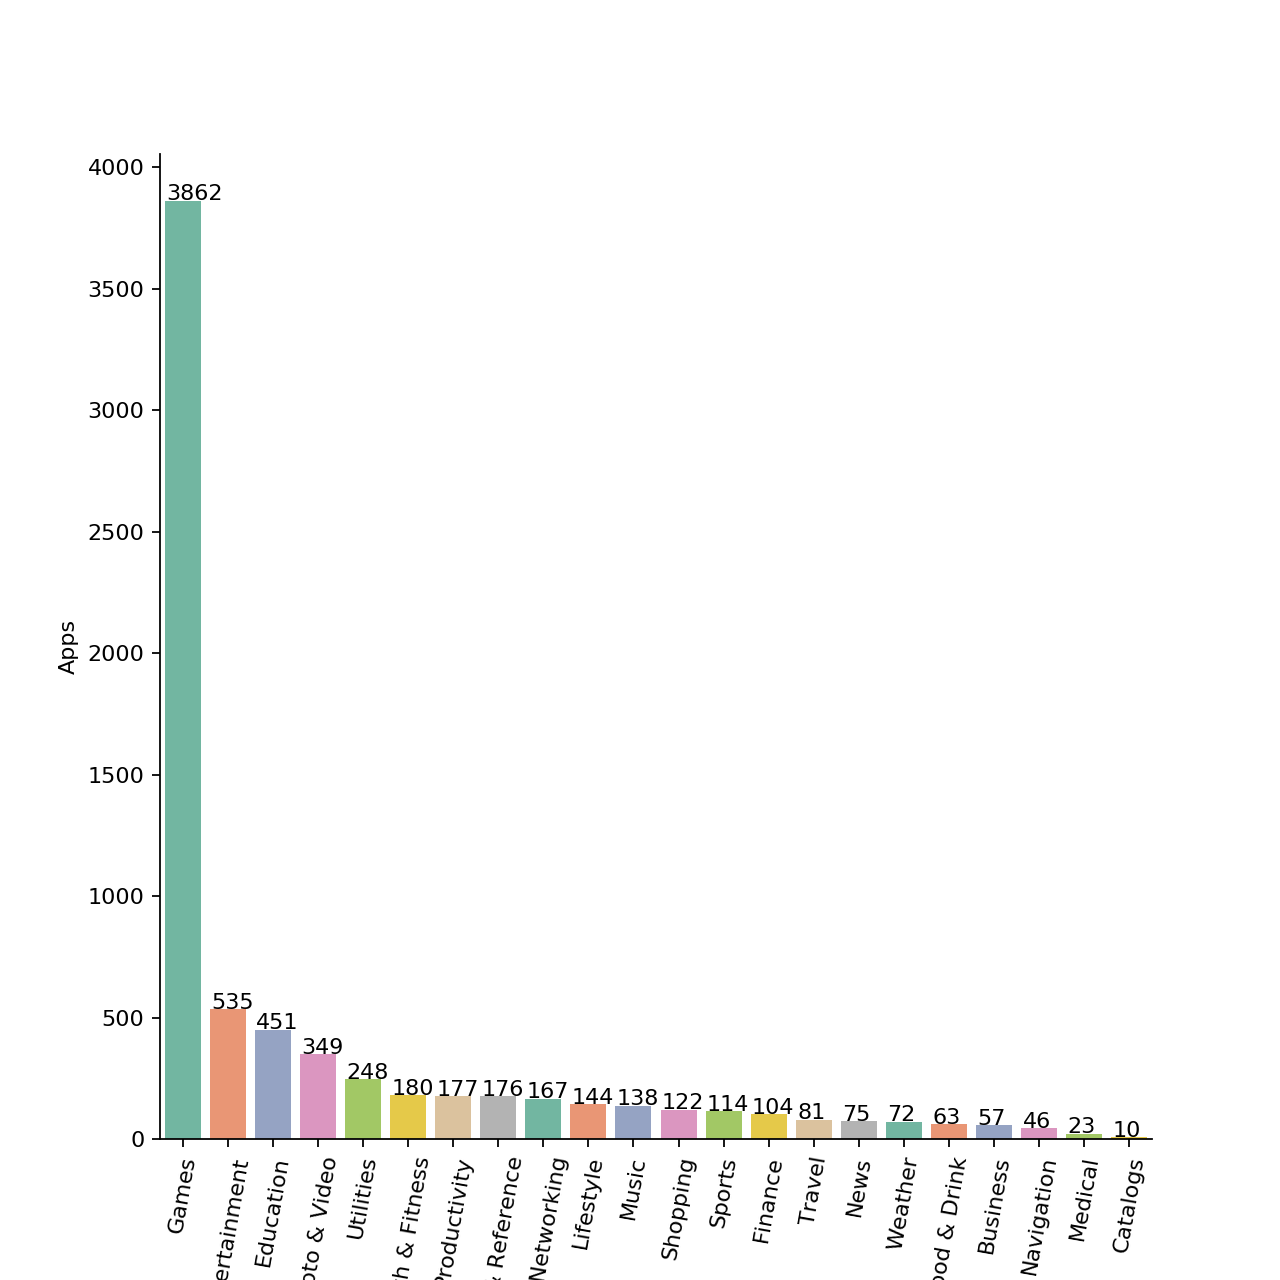

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


In [23]:
#idea from
#https://www.kaggle.com/rj1993/appstore-apps-analysis-and-insights

plt.figure(figsize=(8,8))
ax=sns.countplot('prime_genre',data=apple_store,palette="Set2",order=apple_store['prime_genre'].value_counts().index)
plt.xlabel('Genres')
plt.ylabel('Apps')
plt.xticks(rotation=80)
annot_plot(ax,0.03,1)

<IPython.core.display.Javascript object>


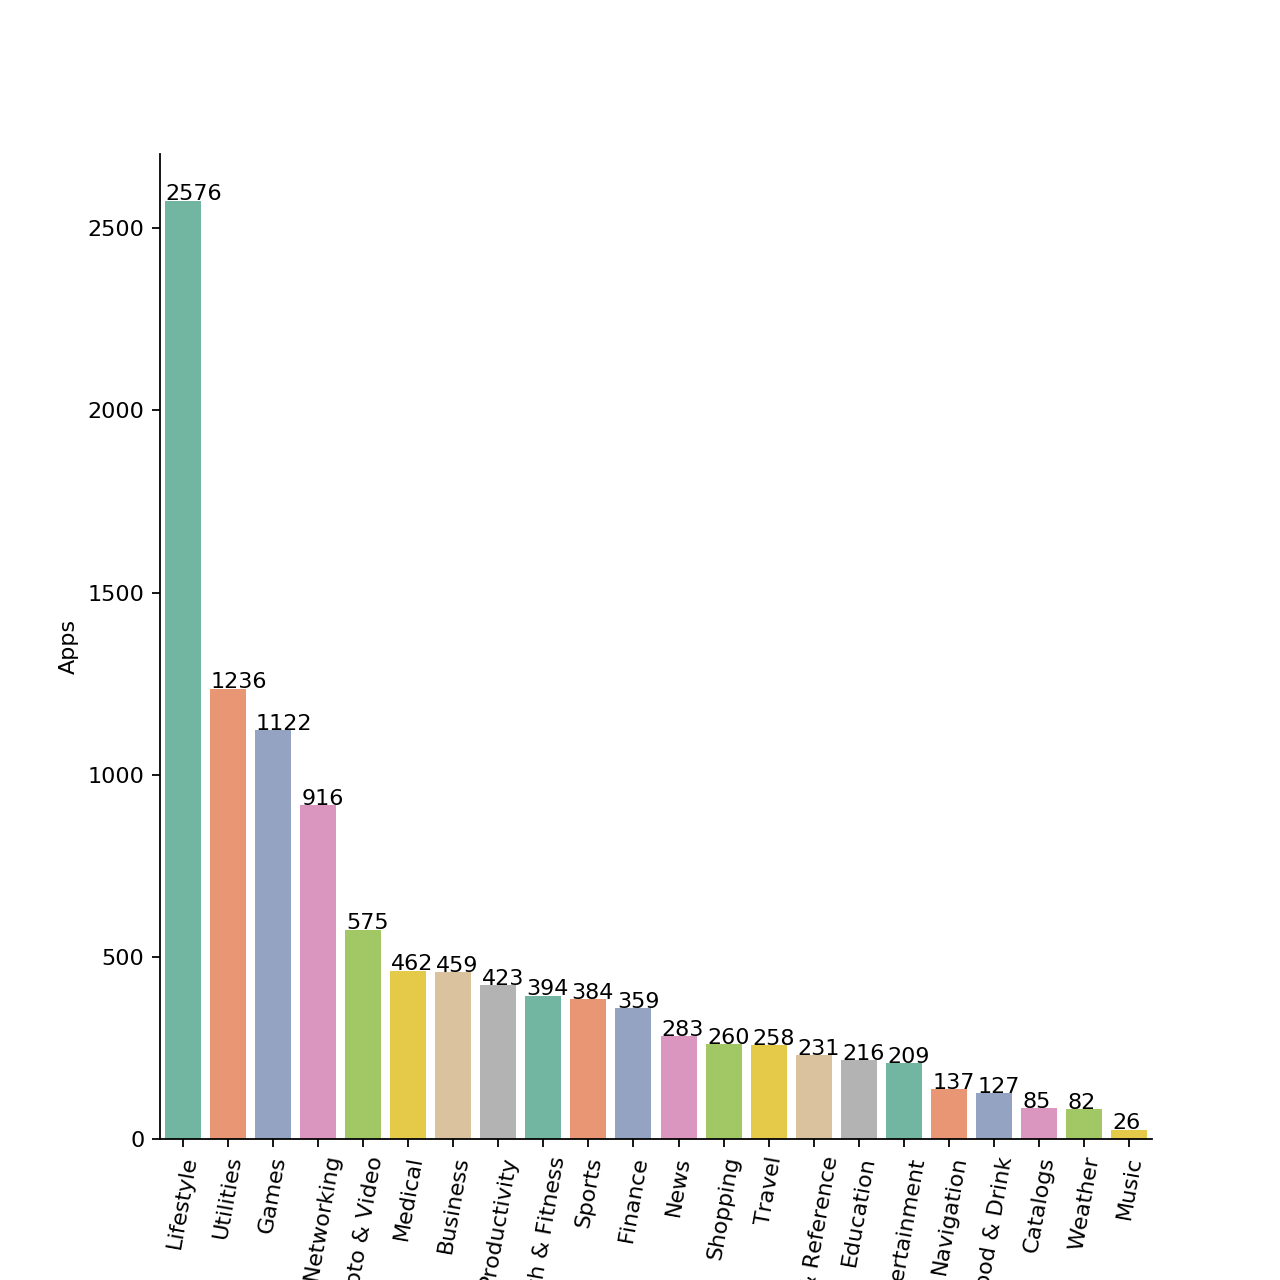

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


In [24]:
#idea from
#https://www.kaggle.com/rj1993/appstore-apps-analysis-and-insights

plt.figure(figsize=(8,8))
ax=sns.countplot('Category',data=google_play_store,palette="Set2",order=google_play_store['Category'].value_counts().index)
plt.xlabel('Genres')
plt.ylabel('Apps')
plt.xticks(rotation=80)
annot_plot(ax,0.03,1)